In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('data/iris.data.csv')
type(df)

pandas.core.frame.DataFrame

In [53]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Text(0.5, 1.0, 'Petal Lenght X Class')

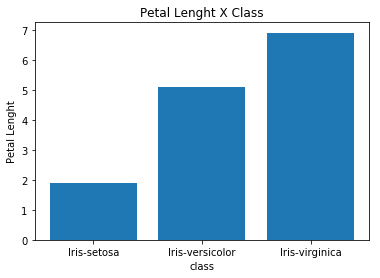

In [56]:
plt.bar(df['class'],df['petal length'])
plt.ylabel('Petal Lenght')
plt.xlabel('class')
plt.title('Petal Lenght X Class')

Text(0.5, 1.0, 'Sepal Lenght X Class')

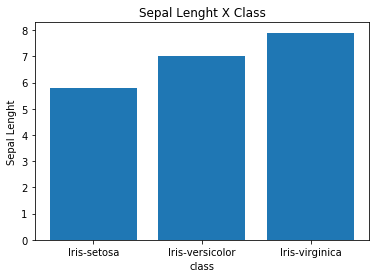

In [57]:
plt.bar(df['class'],df['sepal length'])
plt.ylabel('Sepal Lenght')
plt.xlabel('class')
plt.title('Sepal Lenght X Class')

Text(0.5, 1.0, 'Sepal Length X Petal Length')

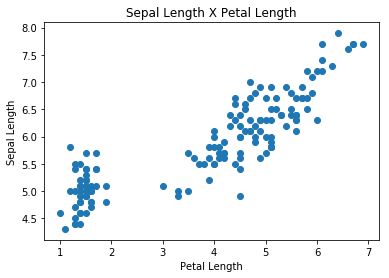

In [58]:
plt.scatter(df['petal length'],df['sepal length'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Sepal Length X Petal Length')

Text(0.5, 1.0, 'Petal Width X Petal length')

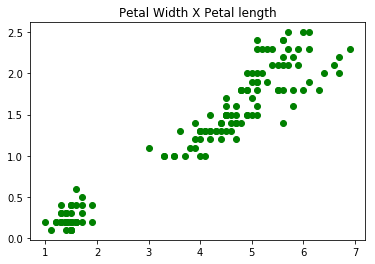

In [59]:
plt.plot(df['petal length'],df['petal width'],'go')
plt.title('Petal Width X Petal length')
#sns.regplot(df['petal length'],df['petal width'])

In [60]:
#Tendencia central
df.mean()

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

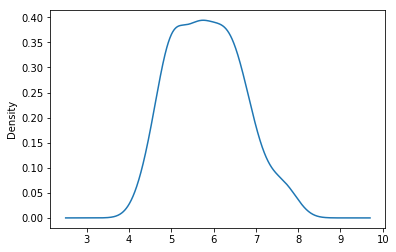

In [61]:
df['sepal length'].plot('kde')

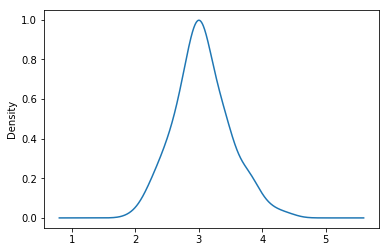

In [62]:
df['sepal width'].plot('kde')

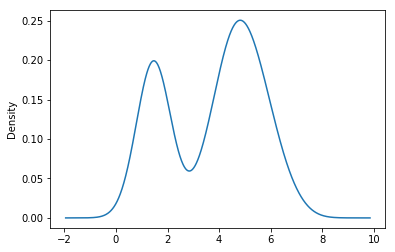

In [63]:
df['petal length'].plot('kde')

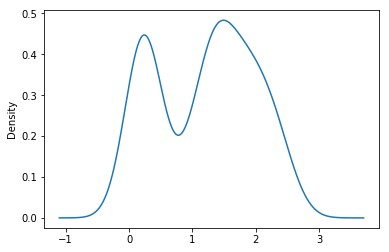

In [64]:
df['petal width'].plot('kde')

In [65]:
dados = df.groupby(by = 'class')

In [66]:
dados.groups

{'Iris-setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'Iris-versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 'Iris-virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

In [67]:
## fazer a média de pétalas e sépalas de cada tipo de flor

In [68]:
dados[['petal length','sepal length']].mean()

,petal length,sepal length
class,,
Iris-setosa,1.464,5.006
Iris-versicolor,4.260,5.936
Iris-virginica,5.552,6.588


class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

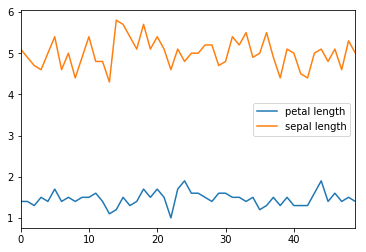

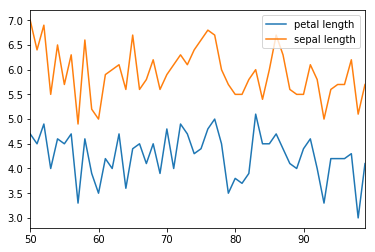

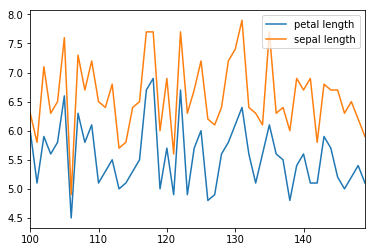

In [69]:
dados[['petal length','sepal length']].plot()

Text(0.5, 1.0, 'Distribuição da sépala na planta Iris setosa')

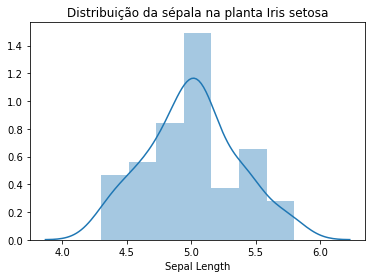

In [70]:
#Histograma: Ver a distribuição de uma série de valores.
setosa = df['class'] == 'Iris-setosa'

ax = sns.distplot(df[setosa]['sepal length'])
ax.set_xlabel('Sepal Length')
ax.set_title('Distribuição da sépala na planta Iris setosa')

Text(0.5, 1.0, 'Distribuição do tamanho da sépala de Iris-veriscolor')

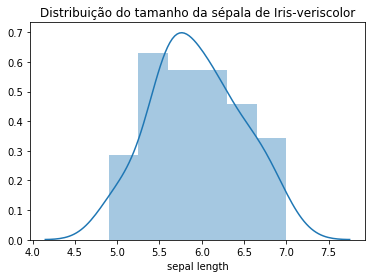

In [71]:
selecao = df['class'] == 'Iris-versicolor'
ax = sns.distplot(df[selecao]['sepal length'])
ax.set_xlabel('sepal length')
ax.set_title('Distribuição do tamanho da sépala de Iris-veriscolor')

Text(0.5, 1.0, 'Distribuição do tamanho da sépala em Iris Virginica')

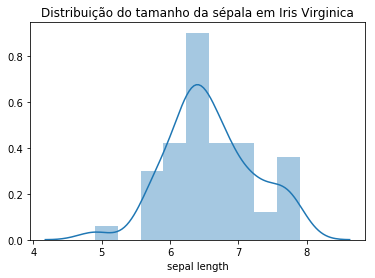

In [72]:
selecao = df['class'] == 'Iris-virginica'
#plt.hist(df[selecao]['sepal length'])
ax = sns.distplot(df[selecao]['sepal length'])
ax.set_xlabel('sepal length')
ax.set_title('Distribuição do tamanho da sépala em Iris Virginica')

Text(0.5, 1.0, 'Distribuição do tamanho de pétalas na flor Iris setosa')

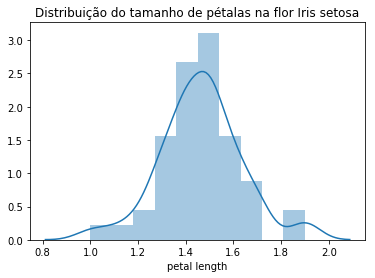

In [73]:
selecao = df['class'] == 'Iris-setosa'
ax = sns.distplot(df[selecao]['petal length'])
ax.set_xlabel('petal length')
ax.set_title('Distribuição do tamanho de pétalas na flor Iris setosa')

Text(0.5, 1.0, 'Distribuição do tamanho de pétalas na flor Iris versicolor')

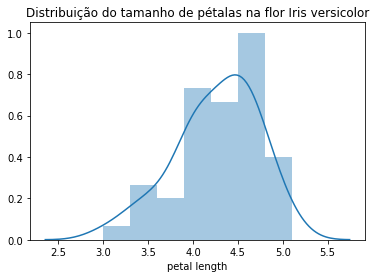

In [74]:
selecao = df['class'] == 'Iris-versicolor'
ax = sns.distplot(df[selecao]['petal length'])
ax.set_xlabel('petal length')
ax.set_title('Distribuição do tamanho de pétalas na flor Iris versicolor')

Text(0.5, 1.0, 'Distribuição do tamanho de pétalas na flor Iris virginica')

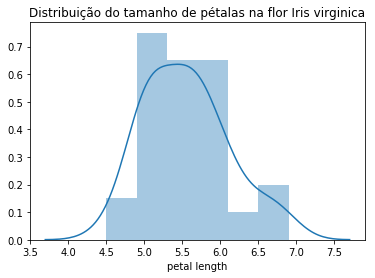

In [75]:
selecao = df['class'] == 'Iris-virginica'
ax = sns.distplot(df[selecao]['petal length'])
ax.set_xlabel('petal length')
ax.set_title('Distribuição do tamanho de pétalas na flor Iris virginica')

Text(0.5, 1.0, 'Média de tamanho das sétalas por classe')

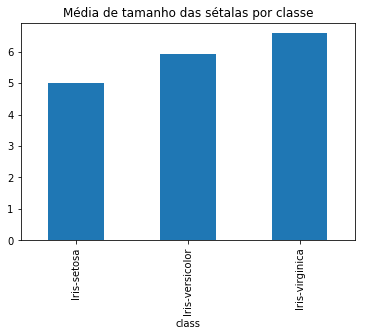

In [76]:
df.groupby(['class'])['sepal length'].mean().plot.bar()
plt.title('Média de tamanho das sétalas por classe')

Text(0.5, 1.0, 'Média de tamanho das pétalas por classe')

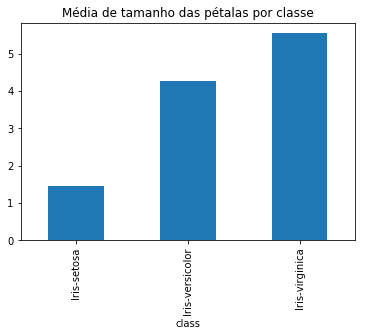

In [77]:
df.groupby(['class'])['petal length'].mean().plot.bar()
plt.title('Média de tamanho das pétalas por classe')

Text(0.5, 1.0, 'Média de largura da sépala por classe')

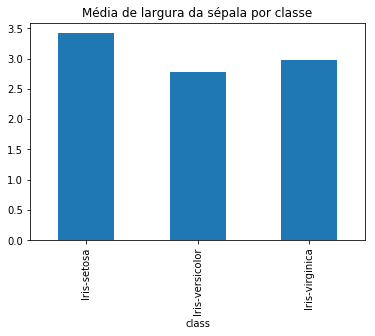

In [78]:
teste = df.groupby('class')['sepal width'].mean().plot.bar()
plt.title('Média de largura da sépala por classe')

Text(0.5, 1.0, 'Distribuição da largura da sépalas de Iris setosa')

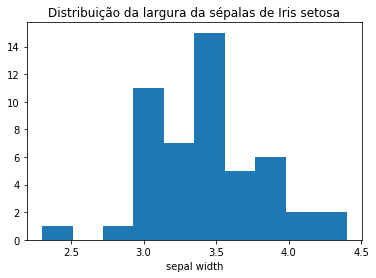

In [79]:
selecao = df['class'] == 'Iris-setosa'
plt.hist(df[selecao]['sepal width'])
plt.xlabel('sepal width')
plt.title('Distribuição da largura da sépalas de Iris setosa')

Text(0.5, 1.0, 'Distribuição da largura da sépalas de Iris versicolor')

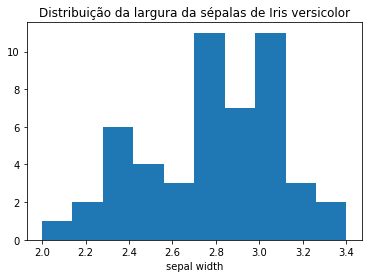

In [80]:
selecao = df['class'] == 'Iris-versicolor'
plt.hist(df[selecao]['sepal width'])
plt.xlabel('sepal width')
plt.title('Distribuição da largura da sépalas de Iris versicolor')

Text(0.5, 1.0, 'Distribuição da largura da sépalas de Iris virginica')

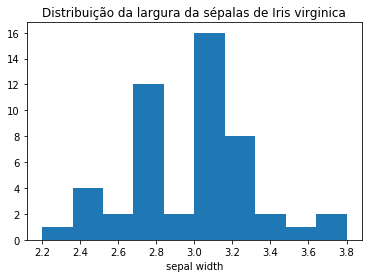

In [81]:
selecao = df['class'] == 'Iris-virginica'
plt.hist(df[selecao]['sepal width'])
plt.xlabel('sepal width')
plt.title('Distribuição da largura da sépalas de Iris virginica')

Text(0.5, 1.0, 'Média de largura da pétala por classe')

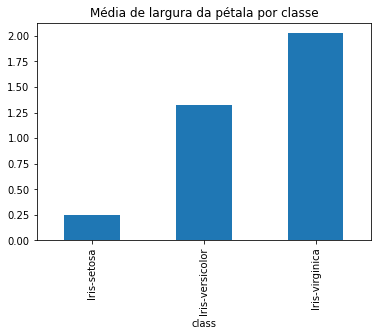

In [82]:
df.groupby('class')['petal width'].mean().plot.bar()
plt.title('Média de largura da pétala por classe')

Text(0.5, 1.0, 'Iris setosa')

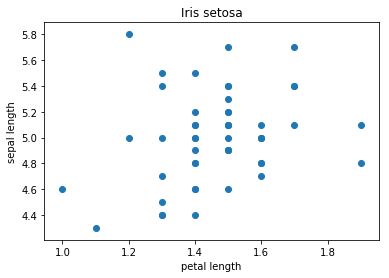

In [83]:
selecao = df['class'] == 'Iris-setosa'
plt.scatter(df[selecao]['petal length'],df[selecao]['sepal length'])
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris setosa')

Text(0.5, 1.0, 'Iris versicolor')

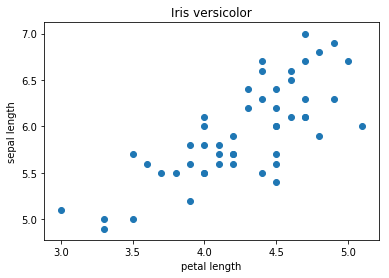

In [84]:
selecao = df['class'] == 'Iris-versicolor'
plt.scatter(df[selecao]['petal length'],df[selecao]['sepal length'])
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris versicolor')

Text(0.5, 1.0, 'Iris virginica')

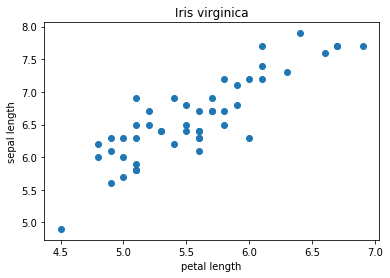

In [85]:
selecao = df['class'] == 'Iris-virginica'
plt.scatter(df[selecao]['petal length'],df[selecao]['sepal length'])
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Iris virginica')

#sns.regplot(df[selecao]['petal length'],df[selecao]['sepal length'])

Text(0.5, 1.0, 'Iris virginica')

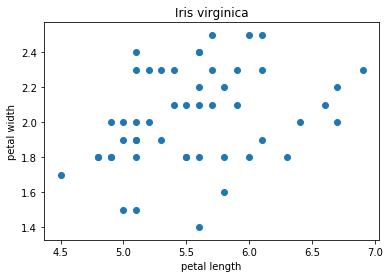

In [86]:
#como podemos perceber, temos flores do tipo virginica e versicolor que tem tamanho de pétala igual a 5 e tamanho de sépalas parecidas.
#Oque diferencia um do outro? A largura

selecao = df['class'] == 'Iris-virginica'
plt.scatter(df[selecao]['petal length'],df[selecao]['petal width'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Iris virginica')

Text(0.5, 1.0, 'Iris versicolor')

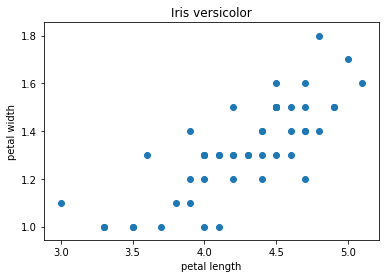

In [87]:
selecao = df['class'] == 'Iris-versicolor'
plt.scatter(df[selecao]['petal length'],df[selecao]['petal width'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Iris versicolor')

## Amplitude
#### Como os dados estão espalhados, + perto de 0 = dados não estão muito espalhados

In [88]:
print('Amplitude Sepal Length: {}'.format(df['sepal length'].max() - df['sepal length'].min()))
print('Amplitude Sepal Width: {}'.format(df['sepal width'].max()-df['sepal width'].min()))
print('Amplitude Petal Length: {}'.format(df['petal length'].max()-df['petal length'].min()))
print('Amplitude Petal Width: {}'.format(df['petal width'].max()-df['petal width'].min()))

Amplitude Sepal Length: 3.6000000000000005
Amplitude Sepal Width: 2.4000000000000004
Amplitude Petal Length: 5.9
Amplitude Petal Width: 2.4


(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

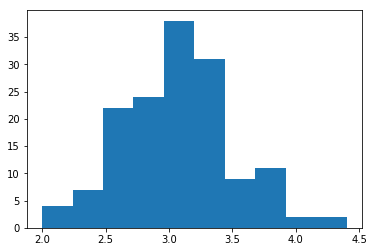

In [89]:
plt.hist(df['sepal width'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

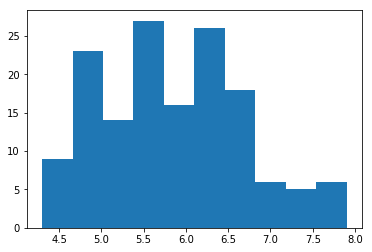

In [90]:
plt.hist(df['sepal length'])

Média tamanho da pétala,  3.7586666666666693


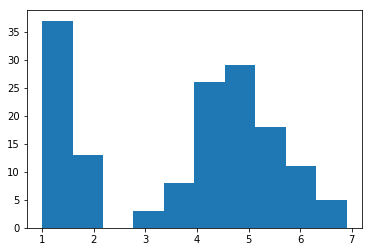

In [91]:
plt.hist(df['petal length'])
print('Média tamanho da pétala, ', df['petal length'].mean())

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

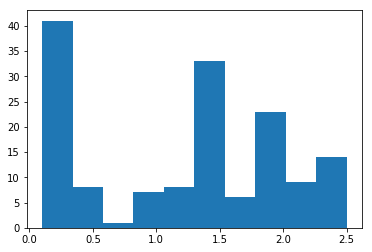

In [92]:
plt.hist(df['petal width'])

Text(0.5, 0, '')

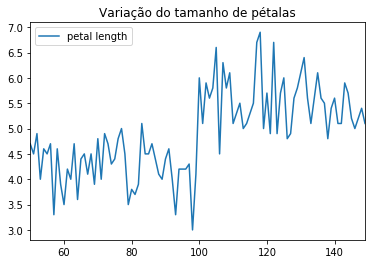

In [93]:
colunas = 'petal length','class'
df_versvirg = df.loc[(df['class']=='Iris-versicolor')|(df['class']=='Iris-virginica'),colunas]
df_versvirg.plot()
plt.title('Variação do tamanho de pétalas')
plt.xlabel('')

# Variância:
### Mostra quão distante os valores estão da média, é muito influenciada por valores que estão muito distantes da média


In [94]:
print('Variância sepal length: {}'.format(df['sepal length'].var()))
print('Desvio Padrão Sepal Width: {}'.format(df['sepal width'].var()))
print('Desvio Padrão Petal Length: {}'.format(df['petal length'].var()))
print('Desvio Padrão Sepal Width: {}'.format(df['petal width'].var()))

Variância sepal length: 0.6856935123042505
Desvio Padrão Sepal Width: 0.18800402684563763
Desvio Padrão Petal Length: 3.1131794183445156
Desvio Padrão Sepal Width: 0.5824143176733784


# Desvio padrão:


In [95]:
print('Desvio Padrão sepal length: {}'.format(df['sepal length'].std()))
print('Desvio Padrão Sepal Width: {}'.format(df['sepal width'].std()))
print('Desvio Padrão Petal Length: {}'.format(df['petal length'].std()))
print('Desvio Padrão Sepal Width: {}'.format(df['petal width'].std()))

Desvio Padrão sepal length: 0.8280661279778629
Desvio Padrão Sepal Width: 0.4335943113621737
Desvio Padrão Petal Length: 1.7644204199522617
Desvio Padrão Sepal Width: 0.7631607417008414


# Covariância: 
### Indica inter-dependencia entre 2 variáveis. Indica como 2 variáveis se comportam conjuntamente em relação as suas médias.
### 0 = totalmente independentes
### 1 =< quando uma é grande, a outra também é grande
### -1 >= quando uma é grande , a outra é pequena

In [96]:
df.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


Text(0.5, 1.0, 'Tendência da Tamanho X largura da sépala')

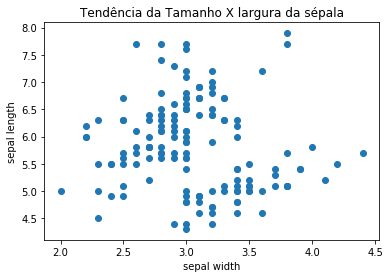

In [4]:
plt.scatter(df['sepal width'],df['sepal length'])
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.title('Tendência da Tamanho X largura da sépala')


Text(0.5, 1.0, 'Tendencia do tamanho da pétala X largura da Sépala')

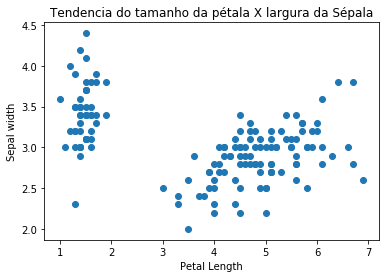

In [98]:
plt.scatter(df['petal length'],df['sepal width'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal width')
plt.title('Tendencia do tamanho da pétala X largura da Sépala')
#podemos observar que há um relacionamento invertido, enquanto um for maior o outro é menor

Text(0.5, 1.0, 'Tendencia do largura da pétala X largura da Sépala')

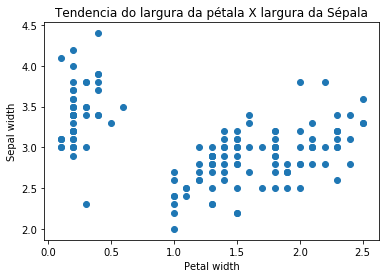

In [99]:
plt.scatter(df['petal width'],df['sepal width'])
plt.xlabel('Petal width')
plt.ylabel('Sepal width')
plt.title('Tendencia do largura da pétala X largura da Sépala')
#relação inversa também, conforme a largura da sepala é grande, a largura da petala é pequena

Text(0.5, 1.0, 'Tendencia do largura da pétala X tamanho da pétala')

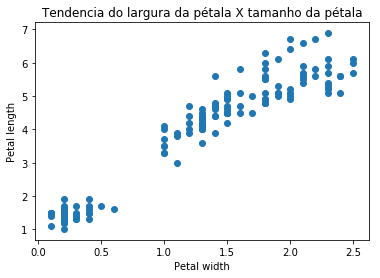

In [5]:
plt.scatter(df['petal width'],df['petal length'])
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.title('Tendencia do largura da pétala X tamanho da pétala')

Text(0.5, 1.0, 'Media do tamanho de sépalas por classe')

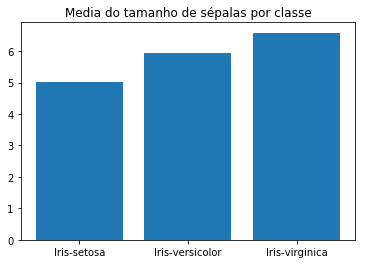

In [100]:
var_sepala = df.groupby(['class'])['sepal length']
label = var_sepala.mean().index
valor = valores = var_sepala.mean().values
plt.bar(label,valor)
plt.title('Media do tamanho de sépalas por classe')

# Correlação
### Indica o quanto duas variáveis estão relacionadas.
### 1 = Correlação perfeita
### 0,25 = Correlação positiva relativamente fraca
### -1 = Anti-correlação

In [101]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


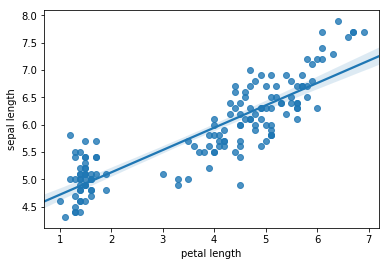

In [102]:
grap1 = sns.regplot(x='petal length',y='sepal length',data=df)
grap1.figure.savefig("grafico_reg.png")

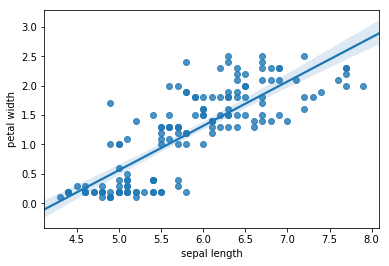

In [103]:
sns.regplot(x='sepal length',y='petal width',data=df)

In [104]:
tipos_flores = df.groupby('class')

In [105]:
for flores,dados in tipos_flores:
    print(flores)

Iris-setosa
Iris-versicolor
Iris-virginica


## Verificar outliers
### Outliers = valores atípicos
### Univariados: detectado ao se analisar a distribuição de 1 variável simples
### Multivariados: detectado ao se analisar mais de uma variável ou espaço "n-dimensional"
#### Formas de detectar:
##### Boxplot
##### Scatter plot

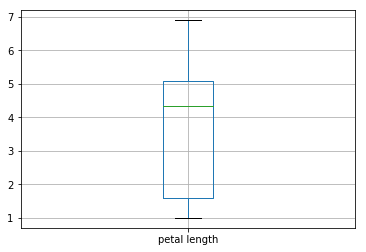

In [106]:
df.boxplot(['petal length'])

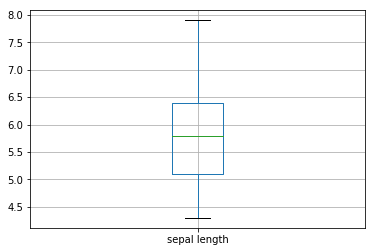

In [107]:
df.boxplot(['sepal length'])

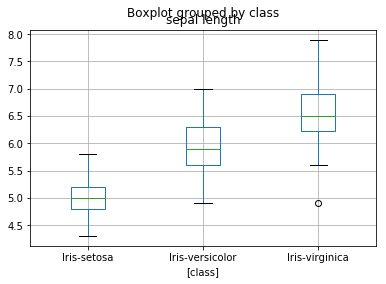

In [108]:
df.boxplot(['sepal length'],by=['class'])

## Modelamento

### Arvore de decisão

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

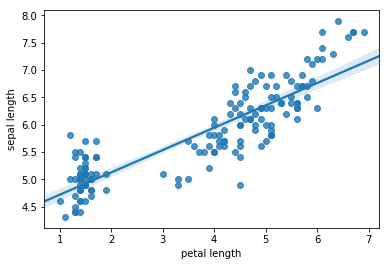

In [110]:
sns.regplot(x='petal length',y='sepal length',data=df)

##### random_state:  É comum na maioria dos algoritmos e é importante mantê-lo fixo, o valor não importa, desde que seja sempre o mesmo, dessa forma conseguiremos gerar sempre o mesmo modelo com os mesmos dados.
##### Criterion: É a métrica utilizada para construção da árvore de decisão. Pode ser gini ou entropy
##### max_depth: É a profundida máxima da árvore, profundida demais pode gerar um sistema super especializado nos dados de treinamento, também conhecido como overfitting. Profundida de menos vai diminuir a capacidade de generalização do modelo.

In [111]:
#df['class'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)
#df.head(2)

In [112]:
X = np.array(df[['sepal length','sepal width','petal width','petal length']])
Y = np.array(df['class'])
print(X)
print(Y)
x1,x1_test,y1,y1_test = train_test_split(X,Y,test_size=0.3,random_state=3)

[[5.1 3.5 0.2 1.4]
 [4.9 3.  0.2 1.4]
 [4.7 3.2 0.2 1.3]
 [4.6 3.1 0.2 1.5]
 [5.  3.6 0.2 1.4]
 [5.4 3.9 0.4 1.7]
 [4.6 3.4 0.3 1.4]
 [5.  3.4 0.2 1.5]
 [4.4 2.9 0.2 1.4]
 [4.9 3.1 0.1 1.5]
 [5.4 3.7 0.2 1.5]
 [4.8 3.4 0.2 1.6]
 [4.8 3.  0.1 1.4]
 [4.3 3.  0.1 1.1]
 [5.8 4.  0.2 1.2]
 [5.7 4.4 0.4 1.5]
 [5.4 3.9 0.4 1.3]
 [5.1 3.5 0.3 1.4]
 [5.7 3.8 0.3 1.7]
 [5.1 3.8 0.3 1.5]
 [5.4 3.4 0.2 1.7]
 [5.1 3.7 0.4 1.5]
 [4.6 3.6 0.2 1. ]
 [5.1 3.3 0.5 1.7]
 [4.8 3.4 0.2 1.9]
 [5.  3.  0.2 1.6]
 [5.  3.4 0.4 1.6]
 [5.2 3.5 0.2 1.5]
 [5.2 3.4 0.2 1.4]
 [4.7 3.2 0.2 1.6]
 [4.8 3.1 0.2 1.6]
 [5.4 3.4 0.4 1.5]
 [5.2 4.1 0.1 1.5]
 [5.5 4.2 0.2 1.4]
 [4.9 3.1 0.1 1.5]
 [5.  3.2 0.2 1.2]
 [5.5 3.5 0.2 1.3]
 [4.9 3.1 0.1 1.5]
 [4.4 3.  0.2 1.3]
 [5.1 3.4 0.2 1.5]
 [5.  3.5 0.3 1.3]
 [4.5 2.3 0.3 1.3]
 [4.4 3.2 0.2 1.3]
 [5.  3.5 0.6 1.6]
 [5.1 3.8 0.4 1.9]
 [4.8 3.  0.3 1.4]
 [5.1 3.8 0.2 1.6]
 [4.6 3.2 0.2 1.4]
 [5.3 3.7 0.2 1.5]
 [5.  3.3 0.2 1.4]
 [7.  3.2 1.4 4.7]
 [6.4 3.2 1.5 4.5]
 [6.9 3.1 1.

#### critério = "entropia" para que possamos ver o ganho de informação de cada nó

In [113]:
arvore = DecisionTreeClassifier(criterion="entropy")

In [114]:
arvore.fit(x1,y1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
arvore.score(x1_test,y1_test)

0.9333333333333333

In [116]:
predTree = arvore.predict(x1_test)

In [117]:
predTree

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### Evolução

#### Normalmente só calculando a acuracia, não diz se nosso modelo é bom ou ruim, pois ela só leva em consideração os Verdadeiros Positivos e Verdadeiros Negativos.
#### Portanto o melhor a se fazer é calcular a sensibilidade (recall) do nosso modelo também, ou seja, o quanto de certeza que ele tem ao classificar uma entrada, portanto a frequência que meu classificador encontra os exemplos de uma classe
#### Ou seja um modelo que tem um alto recall e uma baixa acurácia, quer dizer que ele não tem confiança no que prevê, podendo resultar em Positivo Falso
#### Modelos que prevêm "sim" somente quando está extremamente confiante, provavelmente terá uma acurácia alta e uma sensibilidade mais baixa

In [118]:
print("Precisão em porcentagem do teste: ", metrics.accuracy_score(y1_test, predTree)*100)

Precisão em porcentagem do teste:  93.33333333333333


In [119]:
print("Recall do modelo: ",metrics.recall_score(y1_test, predTree,average=None)*100)

Recall do modelo:  [100.          78.57142857 100.        ]


In [120]:
print('F1 score: ',metrics.f1_score(y1_test, predTree,average=None))

F1 score:  [1.         0.88       0.90322581]


In [121]:
print('Report da classificação: ', metrics.classification_report(y1_test,predTree))
#Micro avg: média dos positivos verdadeiros, falsos negativos e falsos positivos
#Macro avg: média da média não ponderada
#Weighted avg: média da média ponderada por atributo

Report da classificação:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.79      0.88        14
 Iris-virginica       0.82      1.00      0.90        14

      micro avg       0.93      0.93      0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.95      0.93      0.93        45



### Jacard

In [122]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test, predTree)

0.9333333333333333

## Validação Cruzada

In [123]:
# Essa funçào retorna o R-quadrado de cada quebra. E no final fazemos o R-quadrado médio de todas as previsões.
cross_val = cross_val_score(arvore,x1_test,y1_test)
print("Validação cruzada: ",np.mean(cross_val))

Validação cruzada:  0.9535256410256411


C:\Users\LauraDamacenodeAlmei\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [124]:
# saber o score real da validação antes do cálculo de R-quadrado. Essa função retorna o array produzido a cada quebra
cross_val_predict(arvore,x1_test,y1_test,cv=3)


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [125]:
print (predTree[0:5])


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [126]:
print (y1_test[:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### Matriz de confusão

##### É uma tabela que mostra a frequência de classificação para cada classe do modelo.
##### Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. 
##### Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. 
##### Falso verdadeiro (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. 
##### Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente.

In [127]:
matriz = metrics.confusion_matrix(y1_test,predTree)

In [128]:
# entende-se que temos um falso negativo

In [129]:
#xticks e yticks ==> montam a qtd de linhas e colunas
#cmap==> cor
## for percorre as linhas e as colunas da matriz, escrevendo os valores

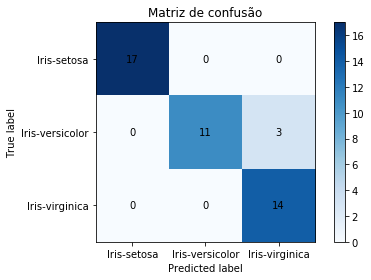

In [130]:
fig, ax = plt.subplots()
classes = df['class'].unique()
im = ax.imshow(matriz,cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(matriz.shape[1]),
           yticks=np.arange(matriz.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusão',
           ylabel='True label',
           xlabel='Predicted label')
thresh = matriz.max().mean()
for i in range(matriz.shape[0]):
    for j in range(matriz.shape[1]):
        ax.text(j, i, format(matriz[i, j]),
                ha="center", va="center",
                color="white" if matriz[i, j] > thresh else "black")
fig.tight_layout()

### Exportar gráficos